# Analysis on Amazon Reviews

data from: https://nijianmo.github.io/amazon/index.html


Goal is to recommend items based on user reviews.

In [2]:
# read in data
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [3]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Video_Games.json.gz')

In [4]:
df.head()

overall  verified   reviewTime      reviewerID        asin  \
0      1.0      True   06 9, 2014  A21ROB4YDOZA5P  0439381673   
1      3.0      True  05 10, 2014  A3TNZ2Q5E7HTHD  0439381673   
2      4.0      True   02 7, 2014  A1OKRM3QFEATQO  0439381673   
3      1.0      True   02 7, 2014  A2XO1JFCNEYV3T  0439381673   
4      4.0      True  01 16, 2014  A19WLPIRHD15TH  0439381673   

       reviewerName                                         reviewText  \
0     Mary M. Clark  I used to play this game years ago and loved i...   
1         Sarabatya  The game itself worked great but the story lin...   
2   Amazon Customer  I had to learn the hard way after ordering thi...   
3  ColoradoPartyof5  The product description should state this clea...   
4    Karen Robinson  I would recommend this learning game for anyon...   

                                             summary  unixReviewTime vote  \
0                                  Did not like this      1402272000  NaN   
1                                     Almost Perfect      1399680000  NaN   
2  DOES NOT WORK WITH MAC OS unless it is 10.3 or...      1391731200   15   
3                           does not work on Mac OSX      1391731200   11   
4                                        Roughing it      1389830400  NaN   

  style image  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN

In [5]:
df_meta = getDF('meta_Video_Games.json.gz')

In [6]:
df_meta.head()

category tech1  \
0                           [Video Games, PC, Games]         
1  [Video Games, Xbox 360, Games, </span></span><...         
2  [Video Games, Retro Gaming & Microconsoles, Su...         
3  [Video Games, Xbox 360, Accessories, Controlle...         
4  [Video Games, PC, Games, </span></span></span>...         

                                         description fit  \
0                                                 []       
1                                [Brand new sealed!]       
2                                                 []       
3  [MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...       
4  [Phonics Alive! 3, The Speller teaches student...       

                                               title      also_buy  \
0                         Reversi Sensory Challenger            []   
1  Medal of Honor: Warfighter - Includes Battlefi...  [B00PADROYW]   
2  street fighter 2 II turbo super nintendo snes ...            []   
3                                 Xbox 360 MAS STICK            []   
4                      Phonics Alive! 3: The Speller            []   

                                               image tech2  \
0  [https://images-na.ssl-images-amazon.com/image...         
1  [https://images-na.ssl-images-amazon.com/image...         
2                                                 []         
3  [https://images-na.ssl-images-amazon.com/image...         
4  [https://images-na.ssl-images-amazon.com/image...         

                                       brand  \
0                       Fidelity Electronics   
1                     by\n    \n    EA Games   
2                                   Nintendo   
3                  by\n    \n    MAS SYSTEMS   
4  by\n    \n    Advanced Software Pty. Ltd.   

                                             feature  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [Original PCB used from Xbox 360 Control Pad (...   
4  [Grades 2-12, Spelling Program, Teaches Spelli...   

                                                rank  \
0  [>#2,623,937 in Toys &amp; Games (See Top 100 ...   
1  [>#67,231 in Video Games (See Top 100 in Video...   
2  [>#134,433 in Video Games (See Top 100 in Vide...   
3  [>#105,263 in Video Games (See Top 100 in Vide...   
4  [>#92,397 in Video Games (See Top 100 in Video...   

                                           also_view          main_cat  \
0                                                 []  Toys &amp; Games   
1  [B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...       Video Games   
2                                                 []       Video Games   
3                                                 []       Video Games   
4                                       [B000BCZ7U0]       Video Games   

  similar_item date                                              price  \
0                                                                        
1                    \n\t\t\t\t\t\t\t\t\t\t\t\t<span class="vertica...   
2                                                                $0.72   
3                                                                        
4                                                                        

         asin details  
0  0042000742     NaN  
1  0078764343     NaN  
2  0276425316     NaN  
3  0324411812     NaN  
4  0439335310     NaN

In [7]:
# merge both data sets

In [8]:
merge = df.merge(df_meta, on="asin", how='left')

In [9]:
pd.options.display.max_columns = None
merge.tail()

overall  verified   reviewTime      reviewerID        asin  \
2848240      5.0      True   08 1, 2018   ANGB54K3888S4  B01HJEBIAA   
2848241      5.0      True  07 17, 2018  A3TEVKR0ZVQB2T  B01HJEBIAA   
2848242      5.0      True   07 6, 2018   ABE7YPWEHNVJZ  B01HJEBIAA   
2848243      5.0      True  06 12, 2018  A3ES9QBK3G192O  B01HJEBIAA   
2848244      5.0      True  04 19, 2018  A194UPGR3OXZB7  B01HJEBIAA   

            reviewerName                                         reviewText  \
2848240             josh                                 Love it, work good   
2848241     Prime Member  I do a lot of copy/paste and other keyboard sh...   
2848242  Amazon Customer  One year in and it's still working great!  Hig...   
2848243  Lina Marmolejos                                          EXCELENTE   
2848244            Kayla  Haven't really used it too much but dang this ...   

                                 summary  unixReviewTime vote style  \
2848240                       Works good      1533081600  NaN   NaN   
2848241  Great mouse for work and gaming      1531785600  NaN   NaN   
2848242                       Five Stars      1530835200  NaN   NaN   
2848243                       Five Stars      1528761600  NaN   NaN   
2848244            Gorgeous and durable!      1524096000  NaN   NaN   

                                                   image_x  \
2848240                                                NaN   
2848241  [https://images-na.ssl-images-amazon.com/image...   
2848242                                                NaN   
2848243                                                NaN   
2848244                                                NaN   

                                            category  \
2848240  [Video Games, PC, Accessories, Gaming Mice]   
2848241  [Video Games, PC, Accessories, Gaming Mice]   
2848242  [Video Games, PC, Accessories, Gaming Mice]   
2848243  [Video Games, PC, Accessories, Gaming Mice]   
2848244  [Video Games, PC, Accessories, Gaming Mice]   

                                                     tech1  \
2848240   class="a-keyvalue prodDetTable" role="present...   
2848241   class="a-keyvalue prodDetTable" role="present...   
2848242   class="a-keyvalue prodDetTable" role="present...   
2848243   class="a-keyvalue prodDetTable" role="present...   
2848244   class="a-keyvalue prodDetTable" role="present...   

                                               description fit  \
2848240  [<b>Features and Functions:</b> <br>Quick thum...       
2848241  [<b>Features and Functions:</b> <br>Quick thum...       
2848242  [<b>Features and Functions:</b> <br>Quick thum...       
2848243  [<b>Features and Functions:</b> <br>Quick thum...       
2848244  [<b>Features and Functions:</b> <br>Quick thum...       

                                                     title also_buy  \
2848240  Zelotes 4000 DPI Programmable Gaming Mouse for...       []   
2848241  Zelotes 4000 DPI Programmable Gaming Mouse for...       []   
2848242  Zelotes 4000 DPI Programmable Gaming Mouse for...       []   
2848243  Zelotes 4000 DPI Programmable Gaming Mouse for...       []   
2848244  Zelotes 4000 DPI Programmable Gaming Mouse for...       []   

                                                   image_y tech2    brand  \
2848240  [https://images-na.ssl-images-amazon.com/image...        Zelotes   
2848241  [https://images-na.ssl-images-amazon.com/image...        Zelotes   
2848242  [https://images-na.ssl-images-amazon.com/image...        Zelotes   
2848243  [https://images-na.ssl-images-amazon.com/image...        Zelotes   
2848244  [https://images-na.ssl-images-amazon.com/image...        Zelotes   

                                                   feature  \
2848240  [Customize DPI Switch: 1000/1500/2000/4000,the...   
2848241  [Customize DPI Switch: 1000/1500/2000/4000,the...   
2848242  [Customize DPI Switch: 1000/1500/2000/4000,the...   
2848243  [Customize DPI Switch: 1000/1500/2000/4000,the...   


In [10]:
# overall average of rating 
ratings = []

for review in parse("Video_Games.json.gz"):
  ratings.append(review['overall'])

print(sum(ratings) / len(ratings))

4.0220948494727224


In [11]:
# selecting relevant columns 

df_test = merge[['reviewerID','asin','reviewerName','reviewText','overall','summary','title']]

In [12]:
df_test.head()

reviewerID        asin      reviewerName  \
0  A21ROB4YDOZA5P  0439381673     Mary M. Clark   
1  A3TNZ2Q5E7HTHD  0439381673         Sarabatya   
2  A1OKRM3QFEATQO  0439381673   Amazon Customer   
3  A2XO1JFCNEYV3T  0439381673  ColoradoPartyof5   
4  A19WLPIRHD15TH  0439381673    Karen Robinson   

                                          reviewText  overall  \
0  I used to play this game years ago and loved i...      1.0   
1  The game itself worked great but the story lin...      3.0   
2  I had to learn the hard way after ordering thi...      4.0   
3  The product description should state this clea...      1.0   
4  I would recommend this learning game for anyon...      4.0   

                                             summary  \
0                                  Did not like this   
1                                     Almost Perfect   
2  DOES NOT WORK WITH MAC OS unless it is 10.3 or...   
3                           does not work on Mac OSX   
4                                        Roughing it   

                                               title  
0  BRAND NEW Learning Company Oregon Trail 5th Ed...  
1  BRAND NEW Learning Company Oregon Trail 5th Ed...  
2  BRAND NEW Learning Company Oregon Trail 5th Ed...  
3  BRAND NEW Learning Company Oregon Trail 5th Ed...  
4  BRAND NEW Learning Company Oregon Trail 5th Ed...

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848245 entries, 0 to 2848244
Data columns (total 7 columns):
reviewerID      object
asin            object
reviewerName    object
reviewText      object
overall         float64
summary         object
title           object
dtypes: float64(1), object(6)
memory usage: 173.8+ MB


In [14]:
# drop nulls
df =  df_test.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2841688 entries, 0 to 2848244
Data columns (total 7 columns):
reviewerID      object
asin            object
reviewerName    object
reviewText      object
overall         float64
summary         object
title           object
dtypes: float64(1), object(6)
memory usage: 173.4+ MB


In [15]:
print( 'Total reviews:' , len(df)  )
print( 'Number of products reviewed:' , len(df.asin.unique()) )
print('Total number of reviewers:', len(df.reviewerID.unique()) )

Total reviews: 2841688
Number of products reviewed: 71878
Total number of reviewers: 1538035


## Data Visualization

### Visualizing ratings distribution in the data

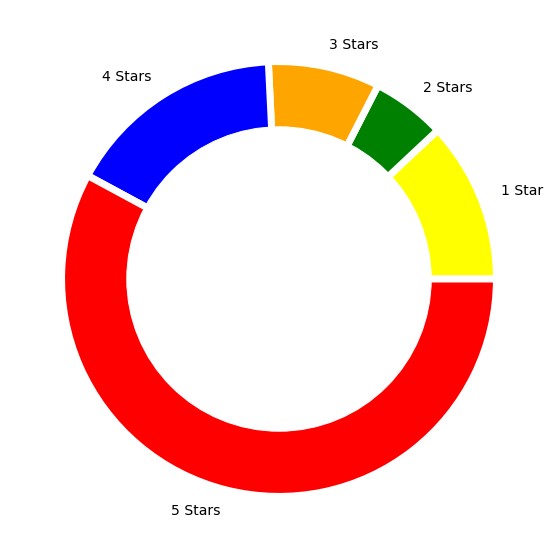

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns 
#Group dataframe by rating 
ratings_distribution = df[['asin','overall']] \
.groupby('overall') \
.count() \
.reset_index() \
.rename( columns = {'asin':'count'} )

#visualize distributions using a doughnut plot 
f,ax = plt.subplots( figsize = (10,10) )
names =  [ '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars' ]
size = list( ratings_distribution['count'] )
my_circle = plt.Circle( (0,0), 0.7, color = 'white' )
plt.pie( size, labels = names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors=['yellow','green','orange','blue', 'red'],
       textprops={'fontsize': 14})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc58769cad0>]],
      dtype=object)

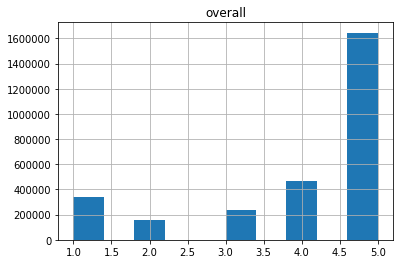

In [17]:
df.hist()

Looking at the charts we can see that 5 star reviews account for *most* of all reviews and 1 star reviews account for the smallest chunk. This can be interpreted as customers only review a product when they are very satisfied.

My previous connotation is most people only review a product when they are very satisfied with it. According to the data that does not seem to be the case.

In [18]:
#Combining review text and summary columns into one column called 'review_text
df['review_text'] = df['reviewText'] + ' . ' + df['summary']
del df['reviewText']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
del df['summary']
df.head()

reviewerID        asin      reviewerName  overall  \
0  A21ROB4YDOZA5P  0439381673     Mary M. Clark      1.0   
1  A3TNZ2Q5E7HTHD  0439381673         Sarabatya      3.0   
2  A1OKRM3QFEATQO  0439381673   Amazon Customer      4.0   
3  A2XO1JFCNEYV3T  0439381673  ColoradoPartyof5      1.0   
4  A19WLPIRHD15TH  0439381673    Karen Robinson      4.0   

                                               title  \
0  BRAND NEW Learning Company Oregon Trail 5th Ed...   
1  BRAND NEW Learning Company Oregon Trail 5th Ed...   
2  BRAND NEW Learning Company Oregon Trail 5th Ed...   
3  BRAND NEW Learning Company Oregon Trail 5th Ed...   
4  BRAND NEW Learning Company Oregon Trail 5th Ed...   

                                         review_text  
0  I used to play this game years ago and loved i...  
1  The game itself worked great but the story lin...  
2  I had to learn the hard way after ordering thi...  
3  The product description should state this clea...  
4  I would recommend this learning game for anyon...

## Data Cleaning & Word Embedding

In [20]:
#importing necessary libraries 
import numpy as np
import string 
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
nltk.download('wordnet')
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anitatran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anitatran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
# sample 10000 randomly for easier computation
df.sample(10000).reset_index(drop=True)

reviewerID        asin                     reviewerName  overall  \
0     A1189TOP3CYJEH  B001C3N0OM                            LADad      4.0   
1     A25S4PI8ECOWD8  B0009XEC0M                           Reggie      3.0   
2      AFHG4LH84IIUE  B002E1MLR8                         I. Gotto      4.0   
3     A39OUYUGI6F064  B00ANGVXDY                     The Best Zed      4.0   
4     A2YXMTCCRJYGLB  B00OAYHIRA                  Amazon Customer      4.0   
5     A3SWUBB476WE83  B00KVHSNB0                    Jesus Sanchez      5.0   
6     A3GPKKUOJL72WI  B000KWZ6D4                            LeoS.      3.0   
7     A1WS1S6Q6D46XD  B000IMYL0U                        Z. Kaplan      1.0   
8      AXUY70HRR7OY0  B00EEMLMW0                   Silvana Gavino      4.0   
9     A1W20HX16LB0P0  B00WW6WSS2                      Vance Lewis      5.0   
10    A1XFOINKRE6JSD  B0042W26A4                   Shayla Haskins      5.0   
11    A1RS06313BL6WN  B007VJ06Q6                     Tom Stopsign      4.0   
12    A3FO2LKZJYYF6U  B0058SHMXM                        SSSwife05      3.0   
13    A3D2HGKT4C3QG8  B000IZK3S6                        center311      1.0   
14    A2OKU05HZ2OD5X  B000TD3IA2                            Zebra      2.0   
15    A16063F1JE1HLM  B003S2MXO8                      Matticus369      5.0   
16    A35B02ZBSN83X6  B004FS8LYK  william Ricardo Criales Salazar      5.0   
17    A2702O3BUTT7SQ  B00DC7G2W8                        Gamerrr72      5.0   
18    A13WLTKQAYFABR  B000F2DE8S                     Adrian Rossi      5.0   
19    A3T0H96WNNLIY6  B003VUJ61U                     Nina Justine      5.0   
20    A1CLUTPJSPLLPN  B00111SFEU                          Charles      5.0   
21    A245E68TVDXLFE  B00E8RVPZ0                          BeckyB7      4.0   
22    A2F0EHJY8FPH5A  B00D7NQP9M                     T. Blackford      5.0   
23     ATV5K2UO9LG8A  B00ZE360UW                  Amazon Customer      5.0   
24     AGZZR0WW0W0VD  B00J8740YI                               TJ      5.0   
25    A28KDFJGNT4JTB  B001CC8UBG                    Berl Lolmaugh      5.0   
26    A27NM69MAENG3R  B019O0VI4I                           TEEKAY      5.0   
27    A32DBK83GB4KAD  B00005QEFD                             arto      5.0   
28    A2SDT2JJXZUQ2N  B00MUY0OFU                            chris      5.0   
29    A1GJ162O7AH7FC  B00000K10U                 Christina Alaniz      5.0   
...              ...         ...                              ...      ...   
9970  A1RW9ZQ5J24KNU  B00HEUNOYS                    Kevin Marques      5.0   
9971  A10IE38UID5ZWD  B000X8EYQU                              NDV      5.0   
9972  A1XY0OW6LOBTS2  B01BY4Q31K                        TheDoovel      4.0   
9973  A2OF8EMCWMNMM6  B0112111VM                      YosemiteLee      3.0   
9974  A2675PXVOBKQ6S  B000246VNY                  Linda Digiacomo      2.0   
9975  A3B0NTWR4SHWM8  B007CS9WYI                      Justin Wild      1.0   
9976   AFNLXOHWU8WXQ  B000A3IA0Y                          W. Sams      2.0   
9977  A1OLQDD2JFCG0E  B00006OP9C                           T. Chi      2.0   
9978   AZPXDDIFC0UA2  B000GKCI4A                        John Hill      5.0   
9979  A2BTYC5W2DEUZP  B003ZTTCBQ                          suzanne      5.0   
9980   AH511350JZBMP  B00007LV80                     Angela Owens      1.0   
9981  A1K4BFN7MWR9AC  B00JK00S0S                         Babadook      5.0   
9982  A2NUR24N1K0MIG  B00009THFF                       G Espinosa      4.0   
9983  A37OVD1XLEDUKD  B01GU2V4DS                  Amazon Customer      5.0   
9984   AG73HLY2YG0PJ  B004IYY8PW                        Malanga82      5.0   
9985  A1JNQCVWFUPQKN  B00HVBPRUO                       kris mcgee      5.0   
9986  A3OHSXN58R5SM2  B003ZSP0WW                   Nicole Johnson      5.0   
9987  A160YQNSDY5VTK  B000B9RI14                   suzanne esaine      5.0   
9988  A2ZFG93YD2OHGQ  B00L3LQ1FI                          Chuckie      5.0   
9989   A5RRZEZZ39FSE  B0091I20E6

In [41]:
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [42]:
%%time
#Function that lemmatizes and then stems word tokens in that order 
def lemmatizer_stemmer(word):
    return PorterStemmer().stem( WordNetLemmatizer().lemmatize(word, pos = 'v') )
#Tokenizer that calls the lemmatizer_stemmer function and removes tokens that are just punctuation 
def tokenizer(text):
    return [ lemmatizer_stemmer(word) for word in nltk.word_tokenize(text) if word not in string.punctuation and len(word) > 3 ]
#Converting pre-processed text to bag of words embedding 
vectorizer_unigram = CountVectorizer( max_features = 100, min_df = 15, max_df = 0.5 , ngram_range = (1,1), stop_words = 'english', tokenizer = tokenizer )
X_unigram_bow = vectorizer_unigram.fit_transform( df.review_text ).tocsc()

CPU times: user 2h 42min 10s, sys: 1min 58s, total: 2h 44min 8s
Wall time: 4h 4min 34s


#### Looking at the 20 most commonly occuring unigrams in the text vectors

In [43]:
freq_unigram = zip( vectorizer_unigram.get_feature_names(), np.asarray( X_unigram_bow.sum(axis = 0) ).ravel() ) 
freq_unigram_sorted = sorted( list(freq_unigram), key = lambda x: x[1] , reverse = True)
for word_tuple in freq_unigram_sorted[:20]:
    print("Feature: '{}' appeared {} times".format(word_tuple[0],word_tuple[1]) )

Feature: 'play' apeared 1542370 times
Feature: 'great' apeared 1238296 times
Feature: 'like' apeared 1155297 times
Feature: 'good' apeared 914788 times
Feature: 'just' apeared 891801 times
Feature: 'work' apeared 843576 times
Feature: 'star' apeared 823780 times
Feature: 'veri' apeared 805474 times
Feature: 'time' apeared 776048 times
Feature: 'make' apeared 687318 times
Feature: 'love' apeared 658681 times
Feature: 'control' apeared 609810 times
Feature: 'realli' apeared 587503 times
Feature: 'onli' apeared 558211 times
Feature: 'look' apeared 449514 times
Feature: 'best' apeared 408078 times
Feature: 'come' apeared 403474 times
Feature: 'becaus' apeared 397981 times
Feature: 'use' apeared 390461 times
Feature: 'thing' apeared 390027 times


In [44]:
df.head()

reviewerID        asin      reviewerName  overall  \
0  A21ROB4YDOZA5P  0439381673     Mary M. Clark      1.0   
1  A3TNZ2Q5E7HTHD  0439381673         Sarabatya      3.0   
2  A1OKRM3QFEATQO  0439381673   Amazon Customer      4.0   
3  A2XO1JFCNEYV3T  0439381673  ColoradoPartyof5      1.0   
4  A19WLPIRHD15TH  0439381673    Karen Robinson      4.0   

                                               title  \
0  BRAND NEW Learning Company Oregon Trail 5th Ed...   
1  BRAND NEW Learning Company Oregon Trail 5th Ed...   
2  BRAND NEW Learning Company Oregon Trail 5th Ed...   
3  BRAND NEW Learning Company Oregon Trail 5th Ed...   
4  BRAND NEW Learning Company Oregon Trail 5th Ed...   

                                         review_text  
0  I used to play this game years ago and loved i...  
1  The game itself worked great but the story lin...  
2  I had to learn the hard way after ordering thi...  
3  The product description should state this clea...  
4  I would recommend this learning game for anyon...

In [ ]:
# the percentage of missing data in each column
df.isnull().sum() / len(df)


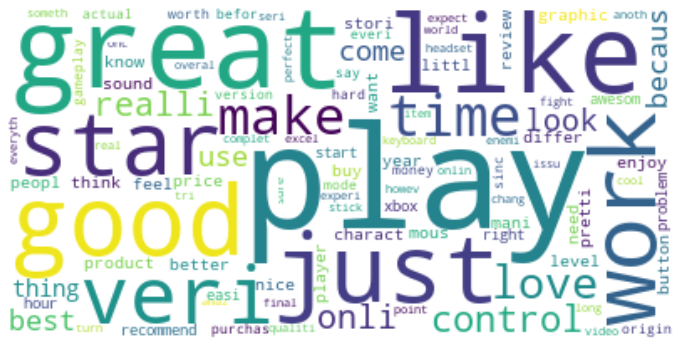

In [45]:
from wordcloud import WordCloud
frequency_dict = dict(freq_unigram_sorted)
wordcloud = WordCloud(background_color = 'white')
wordcloud.generate_from_frequencies(frequencies = frequency_dict)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Looking at the 20 most commonly occuring bi-grams in the text vectors

In [47]:
%%time
vectorizer_bigram = CountVectorizer( max_features = 100, min_df = 15, max_df = 0.5 , ngram_range = (2,2), stop_words = 'english', tokenizer = tokenizer )
X_bigram_bow = vectorizer_bigram.fit_transform( df.review_text ).tocsc()

freq_bigram = zip( vectorizer_bigram.get_feature_names(), np.asarray( X_bigram_bow.sum(axis = 0) ).ravel() ) 
freq_bigram_sorted = sorted( list(freq_bigram), key = lambda x: x[1] , reverse = True)
for word_tuple in freq_bigram_sorted[:20]:
    print("Feature: '{}' apeared {} times".format(word_tuple[0],word_tuple[1]) )


KeyboardInterrupt



Naive Bayes with BOW and TF-IDF Word Embeddings (Multi-Class Classification)


The gensim library has a great pre-processor that tokenizes removes punctuation, non-alphabetic characters,
extra white spaces , stopwords and stems tokens. The purpose of this section is to tokenize and pre-process
review text and fit a naive bayes classifier to see if we can build a model that can with some accuracy
predict the overall rating of a review given the text of the review. For this problem I'll use the follwing
combination of word embeddings with a Naive Bayes classifier.

Unigrams w/ Bag of Words Embeddings
Unigrams w/ Tf-idf Embeddings
Bi-grams w/ Bag of Words Embeddings
Bi-grams w/ Tf-idf Embeddings

In [48]:
from gensim.parsing.preprocessing import preprocess_documents

def gensim_preprocess(text):
    return preprocess_documents( [text] )[0]

vectorizer_unigram_gensim = CountVectorizer( min_df = 15, max_df = 0.7 , ngram_range = (1,1), tokenizer = gensim_preprocess )
X_unigram_bow_gensim = vectorizer_unigram_gensim.fit_transform( df.review_text )

Following steps
- Split dataset into train and test 
- Define pipeline that transforms bag of words to tf-idf embedding 
- Fit a naive bayes classifier

In [49]:
import warnings
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
warnings.simplefilter(action='ignore', category=FutureWarning)

X_unigram = X_unigram_bow_gensim
y = df.overall.values

X_unigram_train,X_unigram_test,y_train,y_test = train_test_split( X_unigram, y, test_size = 0.3, random_state = 42 )

#Pipeline that takes in a Bag of words embeddings (Sklearn Countvectorizer) and converts them to Tf-idf embeddings 
#and trains a Naive Bayes Classifier on them
tfidf_naiveB_pipeline = Pipeline( steps = [ ( 'tfifd', TfidfTransformer() ) , ( 'nb', MultinomialNB() ) ])

#### Unigram w/ Tf-idf Embeddings

In [50]:
#Cross Validating to find best value for hyperparameter alpha
param_dict_nb_tfidf = dict( nb__alpha = [0.001,0.01,1.0,10] )
cv_nb_tfidf_unigram = GridSearchCV( tfidf_naiveB_pipeline, param_grid = param_dict_nb_tfidf, cv = 5, n_jobs = -1, iid = False )
cv_nb_tfidf_unigram.fit(X_unigram_train,y_train)
print('Best Parameter alpha:', cv_nb_tfidf_unigram.best_params_)
print('Best Validation Score:', cv_nb_tfidf_unigram.best_score_)

Best Parameter alpha: {'nb__alpha': 0.01}
Best Validation Score: 0.6502751636568117


In [51]:
test_score1 = cv_nb_tfidf_unigram.best_estimator_.score(X_unigram_test,y_test)  * 100
print('Accuracy on holdout set: {} %'.format(test_score1) )

Accuracy on holdout set: 64.98034620243588 %


#### Unigram w/ Bag of Words Embeddings

In [52]:
#Cross Validating to find best value for hyperparameter alpha
nb = MultinomialNB()
param_dict_nb_countVect = dict( alpha = [0.001,0.01,1.0,10] )
cv_nb_countVect_unigram = GridSearchCV( nb, param_grid = param_dict_nb_countVect, cv = 5, n_jobs = -1, iid = False )
cv_nb_countVect_unigram.fit(X_unigram_train,y_train)
print('Best Parameter alpha:', cv_nb_countVect_unigram.best_params_)
print('Best Validation Score:', cv_nb_countVect_unigram.best_score_)

Best Parameter alpha: {'alpha': 10}
Best Validation Score: 0.6521216524283536


In [53]:
test_score2 = cv_nb_countVect_unigram.best_estimator_.score(X_unigram_test,y_test)  * 100
print('Accuracy on holdout set: {} %'.format(test_score2) )

Accuracy on holdout set: 65.10022791601712 %


In [54]:
vectorizer_bigram_gensim = CountVectorizer(min_df = 15, max_df = 0.7 , ngram_range = (2,2), tokenizer = gensim_preprocess )
X_bigram_bow_gensim = vectorizer_bigram_gensim.fit_transform( df.review_text )

X_bigram = X_bigram_bow_gensim
X_bigram_train, X_bigram_test, y_train, y_test = train_test_split( X_bigram, y, test_size = 0.3, random_state = 42 )

KeyboardInterrupt: 

#### Bi-grams w/ Tf-idf Embeddings

In [ ]:
#Cross Validating to find best value for hyperparameter alpha
cv_nb_tfidf_bigram = GridSearchCV( tfidf_naiveB_pipeline, param_grid = param_dict_nb_tfidf, cv = 5, n_jobs = -1, iid = False )
cv_nb_tfidf_bigram.fit(X_bigram_train, y_train)
print('Best Parameter alpha:', cv_nb_tfidf_bigram.best_params_)
print('Best Validation Score:', cv_nb_tfidf_bigram.best_score_)

In [ ]:
test_score3 = cv_nb_tfidf_bigram.best_estimator_.score(X_bigram_test,y_test)  * 100
print('Accuracy on holdout set: {} %'.format(test_score3) )

#### Bi-grams w/ Bag of Words Embeddings

In [ ]:
#Cross Validating to find best value for hyperparameter alpha
cv_nb_countVect_bigram = GridSearchCV( nb, param_grid = param_dict_nb_countVect, cv = 5, n_jobs = -1, iid = False )
cv_nb_countVect_bigram.fit(X_bigram_train,y_train)
print('Best Parameter alpha:', cv_nb_countVect_bigram.best_params_)
print('Best Validation Score:', cv_nb_countVect_bigram.best_score_)

In [ ]:
test_score4 = cv_nb_countVect_bigram.best_estimator_.score(X_bigram_test,y_test)  * 100
print('Accuracy on holdout set: {} %'.format(test_score4) )

In [ ]:
naive_bayes_specs_dict = { 'Specifications':[ 'Unigram Tfidf' , 'Unigram CountVect', 'Bigram Tfidf', 'Bigram CountVect' ] ,
                         'Accuracy_Score':[ test_score1, test_score2, test_score3, test_score4 ] }
naive_bayes_specs_df = pd.DataFrame( naive_bayes_specs_dict )
naive_bayes_specs_df

With respect to our model's perfomance on unseen data, bigrams <br>
seems to outperform unigrams for both tfidf and BOW approach, with<br>
tfidf and bigrams having the highest accuracy on unseen data at 67.3%

### Interpretible Machine Learning with Local Surrogate Models approach

The purpose of this section to take the best performing model and see what it has learned from the data <br>
and see how it explains a prediction it makes. For this purpose I will be using the <br>
LIME(Local interpretable model agnostic explanations) library which takes a trained model <br>
and fits a local surrogate model or a simpler interpretable model on the predictions of a <br>
more complicated black box model with respect to the observation of interest in order to explain <br>
why the model made the prediction it made. I will be pulling the following rated reviews <br>
that are not present in the dataset the model was trained on:<br>
* A 5-star review (Clearly Positive)
* A 1-star review (Clearly Negative)
* A 3-star review (somewhere in the middle) 
<br>

I will make predicitons using our model on each of these reviews and use a LIME explainer to visualize why our <br>
model made the prediction it made.

In [ ]:
#Importing necessary LIME classes and building a pipeline that vectorizes and makes predictions
#using our best naive bayes model
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
explainer = LimeTextExplainer( class_names = ['1.0', '2.0', '3.0', '4.0', '5.0'] )
exp_pipeline = make_pipeline( vectorizer_unigram_gensim, cv_nb_countVect_unigram.best_estimator_  )

In [ ]:
df.head()

#### Predicting the overall score for a 5-star review from an unseen product

Googled searched 5-star review of Arts & Craft project 
Ref: https://www.amazon.com/4M-Magnetic-Mini-Tile-Art/dp/B0016ISNW2?ref_=fsclp_pl_dp_1

By Molly Walton

In [113]:
test_review_5star = "I am so impressed with this little kit! I bought it along with several other crafts to do with my five-year-old son on rainy days. We painted our tiles and after they dried I added a layer of modge podge to seal and set our little creations. We attached the magnets which stuck nicely and were appropriately strong for the weight of the tiles. I'm going to give them as gifts to the grandparents!"

print( 'Predicted rating', exp_pipeline.predict( [test_review_5star] ) )
print( 'Probabilities for all classes', exp_pipeline.predict_proba( [test_review_5star] ) )

Predicted rating [5.]
Probabilities for all classes [[4.77265411e-06 4.79814933e-04 2.81174021e-03 7.80735883e-02
  9.18630084e-01]]


In [114]:
exp = explainer.explain_instance(test_review_5star, exp_pipeline.predict_proba, num_features=8, top_labels=2)
exp.show_in_notebook(text=True)

Our model made the correct prediction of score 5 <br>
* The model predicted overall rating of 5 with 91% probability becuase from the training data <br> 
it learned to associate words such as 'gifts', 'podge', 'crafts', 'year' with 5-star <br>
reviews.
* The next class with the highest probability predicted by our model is 4 with 38% probability because <br>
our model learned to associate words such as 'grandparents', 'little', 'stuck' and 'rainy' with 4-star reviews.

#### Predicting the overall score for a 1-star review from an unseen product (NEED TO FIX THIS)

Googled searched 1-star review of Arts & Craft project 
Ref: https://www.amazon.com/4M-Magnetic-Mini-Tile-Art/dp/B0016ISNW2?ref_=fsclp_pl_dp_1

By BoomShakaLacka

In [134]:
test_review_1star = "disappointing"

print( 'Predicted rating', exp_pipeline.predict( [test_review_1star] ) )
print( 'Probabilities for all classes', exp_pipeline.predict_proba( [test_review_1star] ) )

Predicted rating [5.]
Probabilities for all classes [[0.18056672 0.14402942 0.18187409 0.09866113 0.39486864]]


In [135]:
exp = explainer.explain_instance(test_review_1star, exp_pipeline.predict_proba, num_features=6, top_labels=2)
exp.show_in_notebook(text=True)

Our model made a close prediction of score 2 <br>
* The model predicted overall rating of 2 with 20% probability from the training data <br> 
it learned to associate words such as 'cheaply', 'tile', 'fell', 'story' with 1-star <br>
reviews.
* The next class with the highest probability predicted by our model is 5 with 22% probability because <br>
our model learned to associate words such as 'art' and 'class' with 5-star reviews.

#### Predicting the overall score for a 3-star review from an unseen review/product

In [127]:
test_review_3star = "Not exactly as I had expected. They are just small tiles that you can get at Home Depot. They are meant to be used with mastic and grout. The magnets are peel and stick and don’t agree because of the uneven underside of the tile. Not for small children, too small to actually paint with any precision. Wouldn’t purchase again."

print( 'Predicted rating', exp_pipeline.predict( [test_review_3star] ) )
print( 'Probabilities for all classes', exp_pipeline.predict_proba( [test_review_3star] ) )

Predicted rating [3.]
Probabilities for all classes [[0.0163531  0.25620098 0.6166085  0.09641358 0.01442385]]


In [128]:
exp = explainer.explain_instance(test_review_3star, exp_pipeline.predict_proba, num_features=8, top_labels=2)
exp.show_in_notebook(text=True)

Our model made the correct prediction of score 3 <br>
* The model predicted overall rating of 3 with 62% probability becuase from the training data <br> 
it learned to associate words such as 'small', 'uneven', 'meant', 'expected', 'magnets', 'actually', 'children' with 3-star <br>
reviews. The model also picked up some noise like 'Clancy', 'Cathy' and 'spies'.
* The next class with the highest probability predicted by our model is 2 with 26% probability because <br>
our model learned to associate words such as 'Depot', 'uneven', 'tile','tiles', 'underside' and 'stick' with 2-star reviews.

### Building a Theme-based recommender system with LDA (Latent Dirichlet Allocation) modelling

The purpose of this section is to use LDA topic modelling to identify various topics in all 5-star reviews <br>
and use them to build a theme based recommender system which given a particular user identifies topics in  <br>
all 5-star reviews given by that user and based on those topics finds other titles the user has not seen   <br>
for which the 5-star reviews given by other users contains similar topics and recommends them to that user. <br>
Steps in building the system : <br>
* Use Spacy and Gensim libraries to tokenize, lemmatize and clean all 5-star reviews and convert them to <br>
bag of word embeddings.
* Fit and LDA model on the word embeddings to identify 50 different topics 
* Use the fitted model to recommend titles to users based on the similar topics found in the titles they <br>
gave 5-star reviews and other title's 5-star reviews that they have not seen.

In [3]:
#Importing all necessary modules 
import numpy as np
import os 
import codecs
import en_core_web_sm
from gensim.parsing.preprocessing import strip_non_alphanum, strip_numeric, strip_multiple_whitespaces, \
remove_stopwords, strip_short , split_alphanum, strip_punctuation
from gensim.models import Phrases
from gensim.models.phrases import Phraser 
from gensim.models.word2vec import LineSentence
import itertools as it 
nlp = en_core_web_sm.load()

In [4]:
#Saving all 5-star review documents locally in a text file 
reviews_path = '/Users/sam/DataScience/Datasets/reviews.txt'
np.savetxt( reviews_path, data.review_text[data.overall == 5].values, fmt = '%s'  )

In [5]:
#Generator function that parses and yields each document in the text file  
def gen_line_review(filename):
    with codecs.open( filename, encoding = 'utf-8' ) as file:
        for review in file:
            review = split_alphanum(review)
            yield review
#Generator Function that parses each document in a file and tokenizes and lematizes using Spacy's pipeline and yields the tokenized document
def gen_lemmatized_corpus( filename ):
    for review in nlp.pipe( gen_line_review(filename), batch_size=10000, n_threads = 3 ):
        yield u' '.join( [ token.lemma_ for token in review if not( token.is_space or token.is_punct ) ] )

In [16]:
#Reading each tokenized and lemmatized review document in unigram format and saving it a text file locally 
unigram_review_filepath = '/Users/sam/DataScience/Datasets/unigram_reviews.txt'
with codecs.open(unigram_review_filepath, 'w', encoding = 'utf-8') as file:
    for review in gen_lemmatized_corpus( reviews_path ):
        file.write(review + '\n')
#Reading the file as a gensim object
unigram_reviews = LineSentence( unigram_review_filepath )

In [35]:
for unigram_review in it.islice( unigram_reviews, 960,965 ):
    print( ' '.join(unigram_review) )
    print('')

captivate story with a great message the tension build the realism be strong in place -PRON- watch -PRON- -PRON- to be sure -PRON- be something -PRON- would want to share with friend then share -PRON- with -PRON- watch -PRON- twice in the first week -PRON- own -PRON-

-PRON- have no idea how much hollywood be add to this movie and to what extent the life and time of ben carson be gloss over or idealize what -PRON- do know be the movie be emotional inspiring powerful and very touching this be the story of a young boy who overcome great odd to succeed in life and make a significant contribution to society -PRON- be also a touching story of the love of a mother -PRON- dedication to -PRON- two son and -PRON- strong determination to see -PRON- have the opportunity to be the very good -PRON- could be this be an excellent movie for the entire family and -PRON- strongly recommend -PRON- to all emotional inspiring and almost heroic

everyone need to see this movie proves that no matter what col

All the tokens in each document are properly lemmatized and instead of lemmatizing pronouns, spacy simply replaces it with -PRON- which is of no <br>
consequence to us since we're only interested in the underlying topics.

#### Using gensim's bigram phraser to capture prevelant bigrams in our documents 

In [47]:
#Function that takes in gensim pre-processing functions as arguements and applies them to a tokenized document 
#for clean up
def clean_up(text_list, **kargs):
    text = ' '.join(text_list)
    for func in kargs:
        text = kargs[func](text)
    return text.strip().split()

#Initializing the bigram phraser and it's wrapper 
bigram_model = Phrases(unigram_reviews)
bigram_phraser = Phraser(bigram_model)

bigram_review_filepath = '/Users/sam/DataScience/Datasets/bigram_reviews.txt'
#Parsing each lemmatized document through a clean up function and then passing it through the bigram phraser and saving the results locally
with codecs.open(bigram_review_filepath, 'w', encoding='utf_8') as file:
    for unigram_review in unigram_reviews:
        unigram_review = clean_up( unigram_review, func1 = strip_non_alphanum, 
                                  func2 = strip_numeric, func3 = strip_multiple_whitespaces, func4 = strip_short )
        bigram_review = u' '.join( bigram_phraser[unigram_review] )   
        file.write(bigram_review + '\n')


bigram_reviews = LineSentence(bigram_review_filepath)

In [49]:
for bigram_review in it.islice( bigram_reviews, 960,965 ):
    print( ' '.join(bigram_review) )
    print('')

captivate story with great message the tension_build the realism strong place PRON watch PRON PRON sure PRON something PRON would want share with friend then share PRON with PRON watch PRON twice the first week PRON own PRON

PRON have idea how much hollywood add this movie and what extent the life and time ben_carson gloss_over idealize what PRON know the movie emotional inspiring powerful and very touching this the story young_boy who overcome great odd succeed life and make significant_contribution society PRON also touching story the love mother PRON dedication PRON two son and PRON strong determination see PRON have the opportunity the very good PRON could this excellent movie for the entire_family and PRON strongly_recommend PRON all emotional inspiring and almost heroic

everyone need see this movie proves that matter what color PRON skin financial background may PRON can make something PRON plan share this with PRON child and extended family PRON need more positive role_model l

The bigram phraser was able to capture certain bigrams such as 'tension_build', 'significant_contribution', 'young_boy','entire_family', 'strongly_recommend', <br>
'role_model', 'ben_carson', 'news_program', 'highly_recommend', 'come_across', 'gifted_hands' in our lemmatized documents.

In [73]:
#Further preprocessing the bigram embeddings by removing stopwords, extra space and an extremely prevalent noise word "quot"
preprocessed_reviews_filepath = '/Users/sam/DataScience/Datasets/preprocessed_reviews.txt'
with codecs.open( preprocessed_reviews_filepath, 'w', encoding = 'utf-8' ) as file:
    for bigram_review in bigram_reviews:
        bigram_review = clean_up( bigram_review, func = remove_stopwords )
        preprocessed_review = u' '.join( [ word for word in bigram_review if not( word == 'PRON' or word == '\'s' or word =='quot' ) ] )
        file.write( preprocessed_review + '\n' )

In [74]:
print('Raw Review Text:\n')
for review in it.islice( gen_line_review(reviews_path), 1554, 1555 ):
    print(review)
    
print('-----------\n')
print('Pre-processed:\n')

with codecs.open(preprocessed_reviews_filepath, encoding='utf_8') as file:
    for review in it.islice(file, 1554, 1555):
        print(review)   

Raw Review Text:

While new-comers to Argento should check out AB's release of Deep Red first, this is one of Argento's finest and most accomplished thrillers and certainly more accessible than something like Inferno or Phenomena.  The  plot is deliberately - perhaps deceptively - simple; an American horror  novellist arrives in Italy to promote his new book, but a series of  homicides begin which seem to imitate the murders in his book.  I wouldn't  dream of giving away the ending but trust me - it's worth waiting for.  While it doesn't quite have the visual beauty of Suspiria, or enough twists  or interesting characters to put it in the leages of Deep Red or Bird with  the Crystal Plumage, this film is far from his worst and worth buying if  only for the marvellous presentation - a rare commentary from Argento and  Simonetti and some other guy (a journalist I think), behind the scenes  footage (quite short and lifted from Dario Argento's world of Horror, but a  welcome addition never

Through the above functions and pipelines we were able to severly clean and  prune each review down to important key words ready for topic modelling like the example above. 

In [6]:
#Importing libraries for topic modelling 
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis, pyLDAvis.gensim
import warnings

In [11]:
review_dict_filepath = '/Users/sam/DataScience/Datasets/preprocessed_reviews_dict.txt'
preprocessed_reviews = LineSentence( preprocessed_reviews_filepath )
#Building the vocabulary from our reviews corpora to be used to convert each document to bag of words embedding 
review_dict = Dictionary( preprocessed_reviews )
#Filtering out extreme values from the corpora 
review_dict.filter_extremes( no_below = 15, no_above = 0.4 )
review_dict.compactify()
#Saving the dictionary locally 
review_dict.save( review_dict_filepath )

In [12]:
#Generator function that parses a file containing documents and converts each document to a 
#bag of words embedding 
def generate_bow(file_path):
    for review in LineSentence(file_path):
        yield review_dict.doc2bow(review)

review_dict = Dictionary.load( review_dict_filepath )

reviews_bow_filepath = '/Users/sam/DataScience/Datasets/reviews_bow.txt'

MmCorpus.serialize( reviews_bow_filepath, generate_bow( preprocessed_reviews_filepath ) )

In [8]:
bow_corpus = MmCorpus(reviews_bow_filepath)

In [9]:
#Fitting the LDA model on our bag of word embeddings 
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda = LdaMulticore( bow_corpus, num_topics = 50, id2word = review_dict, workers = 3 )

In [177]:
#Visualizing each topic and it's most commonly occuring frequencies 
for idx, topic in lda.print_topics(-1):
    print('Topic: {} \nWords: {}\n'.format(idx, topic))

Topic: 0 
Words: 0.026*"time" + 0.026*"excellent" + 0.022*"acting" + 0.021*"story" + 0.021*"western" + 0.021*"watch" + 0.019*"actor" + 0.017*"classic" + 0.015*"favorite" + 0.014*"cast"

Topic: 1 
Words: 0.030*"life" + 0.013*"man" + 0.010*"son" + 0.010*"live" + 0.008*"father" + 0.008*"wife" + 0.008*"come" + 0.008*"love" + 0.008*"woman" + 0.008*"leave"

Topic: 2 
Words: 0.066*"book" + 0.033*"read" + 0.019*"story" + 0.017*"novel" + 0.014*"like" + 0.012*"version" + 0.012*"adaptation" + 0.011*"character" + 0.009*"think" + 0.009*"watch"

Topic: 3 
Words: 0.031*"horror" + 0.013*"scary" + 0.013*"like" + 0.011*"zombie" + 0.011*"vampire" + 0.009*"watch" + 0.009*"dead" + 0.009*"time" + 0.008*"halloween" + 0.008*"iron_man"

Topic: 4 
Words: 0.058*"match" + 0.012*"scott" + 0.012*"like" + 0.012*"win" + 0.011*"time" + 0.009*"chocolat" + 0.007*"michael_caine" + 0.007*"actor" + 0.006*"football" + 0.006*"george"

Topic: 5 
Words: 0.012*"action" + 0.007*"violence" + 0.006*"like" + 0.006*"way" + 0.005*"sc

Some of the themes identified by our model are very easy to label such as topic 5 which contains frequencies such as "action","violence", "man", "crimimal", "crime" and is clearly about action/crime movies <br>
and topic 10 that contains frequencies like "bond", "murder", "mystery", "edge", "seat" is clearly about spy/thriller/mystery movies while for some topics such as topic 13 which contains frequencies such as <br>
"like", "know", "people", "think", "thing", "happen", it is not so clear what they are about.

#### Visualizing the topics and the distances between them using the pyLDAvis library

In [12]:
LDAvis_prep = pyLDAvis.gensim.prepare( lda, bow_corpus, review_dict )
pyLDAvis.display( LDAvis_prep )

/Users/sam/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In the above visualization each topic is represented by a bubble in the 2 principal component axes and the distance between any <br>
two bubbles is represented by the similarity of of those topics measured using the word frequencies in each topic. So for <br>
example if two bubbles are very close to each other, our model has identified those topics to be similar, if two bubbles are so <br>
close that they intersect then that means they share some common word frequencies and if two bubbles are far apart , <br>
they don't share common word frequencies and are not very similar to each other. The size of each bubble represents the <br>
proportion of the most relevent terms for the entire corpora found in that particular topic. <br>
<br>
Looking at the graph we see that on the graph topic number 22 and 33 are very fart apart from each other which means <br>
our LDA model was able to learn that topic 22 with themes such as "love", "romance", "romantic", "woman" is further apart or not <br>
similar to topic 33 with themes such as "comic_book", "superhero", "villain", "batman", "spiderman". 

#### Building the recommender system 

In [197]:
#Function that works as a pipeline in applying all the steps seen above to a raw review to convert it 
#to a clean bag of words embedding 
def _get_topics(review):
    
    spacy_tokenized_review = nlp( review )
    
    unigram_lemmatized_review = [  token.lemma_ for token in spacy_tokenized_review if not( token.is_space or token.is_punct ) ] 
    
    cleaned_lemmatized_unigram_review = clean_up( unigram_lemmatized_review, func1 = strip_non_alphanum, 
                                  func2 = strip_numeric, func3 = strip_multiple_whitespaces, func4 = strip_short )
    
    bigram_review =  bigram_phraser[cleaned_lemmatized_unigram_review]
    
    cleaned_bigram_review = clean_up( bigram_review, func = remove_stopwords )
    
    pre_processed_review = [ word for word in cleaned_bigram_review if not( word == 'PRON' or word == '\'s' or word =='quot' ) ]
    
    bow_review = review_dict.doc2bow(  pre_processed_review  )
    
    lda_review = sorted( lda[bow_review], key = lambda t: t[1], reverse = True)
    
    return lda_review

#Displays topics identified in a given review 
def display_topics(review, min_topic_freq = 0.1):
    for topic_num, freq in _get_topics(review):
        if freq < min_topic_freq:
            break
        print('Topic Number: {:<10} {:.3f}'.format( topic_num, freq ) )

In [68]:
five_star_review_1 = data[ data.overall == 5 ].review_text[89456]
five_star_review_1

'When i started watching the mad max movies i started with whichever one i found at the store and so i wound up going backward, starting with beyond thunder dome.  I was hooked in right then and there and i knew there was no way any other one would compare. I was wrong.  I loved Road Warrior the best. It brought something new to the plate.  I think it had a lot to do with the relationship between max and the feral kid. I love an action movie with soul. I think thats why i always loved Terminator 2 so much.  Road Warrior was like that with me.  The Mad Max movies were priceless. I hope they never re make them. . i went into this trilogy so backward but this is my favorite'

In [198]:
display_topics(five_star_review_1)

Topic Number: 25         0.371
Topic Number: 42         0.355
Topic Number: 1          0.183


In [195]:
five_star_review_2 = data[ data.overall == 5 ].review_text[237578]
five_star_review_2

"I've no idea what I could say which many others likely already have, but, what the heck...  Tom Hanks and Darryl Hannah star in this unlikely love affair between a boy and his fish...uh...Mermaid.  John Candy co-stars in a bit role, as was many of his earlier films, as a party headed, drunk, womanizing leech of a brother with the responsibility and conscience of an ingrown toenail.  About as helpful as one too.  The plot thickens as, all grown-up Hank's, Alan must head the company alone; while his brother squanders their livelihood and Alan himself pines away for the spark of love in his heart who he cannot recall and tries to put it off on any current partner.  Until the mysterious Madison shows up and rekindles that spark into a blazing inferno!  Romance, comedy and drama ensues there after. . SPLASH!"

In [199]:
display_topics(five_star_review_2)

Topic Number: 14         0.320
Topic Number: 44         0.190
Topic Number: 1          0.115


In [227]:
from collections import Counter
#Function that pre-processed and extracts all the topics in a given raw review 
def _extract_topics(review):
    return [ t[0] for t in _get_topics(review) if t[1] > 0.1 ]
#Given a user, parses all the reviews given by that user and returns the 3 most prevalent topics in their reviews
def _get_user_topics(user_id):
    topics = []
    user_reviews = data[(data.reviewerID == user_id) & (data.overall == 5) ].review_text
    for review in user_reviews:
        topics.append( _extract_topics(review) )
    counter = Counter( [ topic_nums for inner_list in topics for topic_nums in inner_list ] )
    return [ t[0] for t in counter.most_common(3) ]
#Given a user returns a list of titles based on all the favorable reviews left by the user 
def recommend_titles(user_id):
    titles = []
    target_topics = _get_user_topics(user_id)
    print('Target Topics:' , target_topics)
    for index , row in data[ data.overall == 5 ].iterrows():
        topics = _extract_topics(row.review_text)
        for topic in topics:
            if topic in target_topics and row.title not in titles:
                titles.append( row.title )
    return titles     

In [228]:
user = 'A3QOPWF1LQCR6L'
titles = recommend_titles(user)
print('Total titles found:', len(titles))

Target Topics: [42, 18, 25]
Total titles found: 11030


In [232]:
print('Titles rated highly by this user:\n')
print( data[ (data.overall == 5) & (data.reviewerID == user) ].title )

Titles rated highly by this user:

5006              Air Force One
14633          One Fine Morning
454000    You've Got Mail [VHS]
489576    Black Hawk Down [VHS]
Name: title, dtype: object


In [314]:
print('Subset of titles recommended by our LDA based recommender system:\n')
print(titles[264])
print(titles[161])
print(titles[6176])
print(titles[9156])

Subset of titles recommended by our LDA based recommender system:

The Way We Were - 25th Anniversary Edition [VHS]
The Last Action Hero [VHS]
Detonator [VHS]
Meet the Parents [VHS]


The theme based recommender system was succesfuly able to parse, pre-process , idetify themes and recommend titles <br>
based on favorable reviews given a user. However the model lacked certain finesse and fine tuning and also ended <br>
up being computationally ineffcient and would not be optimal to use when recommendations for multiple users <br>
have to be calculated and returned in real time. <br>
As a result a different approach altogether would be needed to build a more effcient recommender system that supports <br>
faster computation and more fine tuned results. To achieve that I will use a collaborative filtering based recommendation <br>
system using overall review scores in the next section.

### Collaborative Filtering Recommendation System with Matrix Factorization (SVD)
For this recommendation system we're not going to need the reviews but simply the overall ratings given by each user to <br>
different titles. I'm going to use a matrix where the rows are each unique title and the columns are each unique user and then <br>
apply singular value decomposition to reduce dimensionality by extracting the latent factors which would help us better model the<br>
similarity between users and items and create a recommendation system that is computationally efficient and faster once the matrix <br>
has been decomposed to it's latent space with n dimensions.<br>
This approach towards building a recommendation system is pretty popular and is called a model based Collabortaive filtering system.<br>
In layman's term the idea behind this model is that the preferences and attitudes of a user can be determined by a small number of <br>
factors and we'll decompose our utility matrix into these factors and then model the similarity between these titles based on the users <br>
who rated them and recommend them to other users with similar preferences.

In [315]:
#Extracting the features needed to build the utility matrix 
user_rating_title_df = data[['reviewerID', 'title', 'overall']]

In [326]:
user_rating_title_df.head()

reviewerID         title  overall
0   AJSYTZQVJJOYW  Joseph [VHS]      4.0
1  A1QNGKV688Q8TE  Joseph [VHS]      5.0
2  A36311XF4O81IK  Joseph [VHS]      5.0
3   AQ8DU6XVA3USJ  Joseph [VHS]      5.0
4  A1ZLFCUF4XX7RZ  Joseph [VHS]      5.0

In [321]:
print( 'Total unique movie titles in our dataset: {}'\
      .format( len(user_rating_title_df.title.unique() ) ) )

print('Total unique reviewers in our dataset: {}'\
     .format( len( user_rating_title_df.reviewerID.unique() ) ) )

print('Total reviews in our dataset: {}'.format( len(user_rating_title_df) ) )

Total unique movie titles in our dataset: 13074
Total unique reviewers in our dataset: 101076
Total reviews in our dataset: 648300


In [329]:
#Pivoting the extracted dataframe to build the utility matrix and transposing it to get shape we want 
utility_matrix = user_rating_title_df.pivot_table( values = 'overall', columns = 'title', index = 'reviewerID' , fill_value = 0 )
utility_matrix = utility_matrix.T
utility_matrix.head()

reviewerID                                          A00295401U6S2UG3RAQSZ  \
title                                                                       
&quot;Ay, Carmela!&quot; [VHS]                                        0.0   
&quot;IVideo&quot; French                                             0.0   
&quot;Sailor Moon S - Birthday Blues (Vol. 4, T...                    0.0   
&quot;Violent Cop (&quot;&quot;Violent&quot;&qu...                    0.0   
'night, Mother [VHS]                                                  0.0   

reviewerID                                          A00348066Q1WEW5BMESN  \
title                                                                      
&quot;Ay, Carmela!&quot; [VHS]                                       0.0   
&quot;IVideo&quot; French                                            0.0   
&quot;Sailor Moon S - Birthday Blues (Vol. 4, T...                   0.0   
&quot;Violent Cop (&quot;&quot;Violent&quot;&qu...                   0.0   
'night, Mother [VHS]                                                 0.0   

reviewerID                                          A0040548BPHKXMHH3NTI  \
title                                                                      
&quot;Ay, Carmela!&quot; [VHS]                                       0.0   
&quot;IVideo&quot; French                                            0.0   
&quot;Sailor Moon S - Birthday Blues (Vol. 4, T...                   0.0   
&quot;Violent Cop (&quot;&quot;Violent&quot;&qu...                   0.0   
'night, Mother [VHS]                                                 0.0   

reviewerID                                          A00438023NNXSDBGXK56L  \
title                                                                       
&quot;Ay, Carmela!&quot; [VHS]                                        0.0   
&quot;IVideo&quot; French                                             0.0   
&quot;Sailor Moon S - Birthday Blues (Vol. 4, T...                    0.0   
&quot;Violent Cop (&quot;&quot;Violent&quot;&qu...                    0.0   
'night, Mother [VHS]                                                  0.0   

reviewerID                                          A00503563AVX48TRHJGR6  \
title                                                                       
&quot;Ay, Carmela!&quot; [VHS]                                        0.0   
&quot;IVideo&quot; French                                             0.0   
&quot;Sailor Moon S - Birthday Blues (Vol. 4, T...                    0.0   
&quot;Violent Cop (&quot;&quot;Violent&quot;&qu...                    0.0   
'night, Mother [VHS]                                                  0.0   

reviewerID                                          A0056274FAHZQC4N2ZN8  \
title                                                                      
&quot;Ay, Carmela!&quot; [VHS]                                       0.0   
&quot;IVideo&quot; French                                            0.0   
&quot;Sailor Moon S - Birthday Blues (Vol. 4, T...                   0.0   
&quot;Violent Cop (&quot;&quot;Violent&quot;&qu...                   0.0   
'night, Mother [VHS]                                                 0.0   

reviewerID                                          A0057670FKKO20E9X6XL  \
title                                                                      
&quot;Ay, Carmela!&quot; [VHS]                                       0.0   
&quot;IVideo&quot; French                                            0.0   
&quot;Sailor Moon S - Birthday Blues (Vol. 4, T...                   0.0   
&quot;Violent Cop (&quot;&quot;Violent&quot;&qu...                   0.0   
'night, Mother [VHS]                                                 0.0   

reviewerID                                          A00700212KB3K0MVESPIY  \
title                                                                       
&quot;Ay, Carmela!&quot; [VHS]                                        0.0   
&quot;IVideo&quot

In [362]:
from sklearn.decomposition import TruncatedSVD
#Initializing the svd class to decompose our utility matrix to 10000 most important latent factors 
svd = TruncatedSVD(n_components = 10000, random_state = 42)
#Fitting it on our data
t_matrix = svd.fit_transform( utility_matrix )
#Calculating the correlation matrix of our decomposed matrix 
corr_mat = np.corrcoef( t_matrix )

In [366]:
#Saving the decomposed and correlation matrix to file 
corr_svd_mat_filepath = '/Users/sam/DataScience/Datasets/corr_svd_mat_reviews'
np.save( corr_svd_mat_filepath, corr_mat )
svd_mat_filepath = '/Users/sam/DataScience/Datasets/svd_mat_reviews'
np.save( svd_mat_filepath, t_matrix )

In [559]:
movie_names =  utility_matrix.T.columns 
movie_names_list = list( movie_names )
#Function that takes in a user id and returns a list containing the top 5 recommendations for each movie
#the user rated 5 stars based on the calculated corr matrix 
def recommend_titles_cf(user_id):
    
    recommended = []
    user_movies = set( data[ (data.reviewerID == user) & (data.overall == 5) ].title )
    
    for w_title in user_movies:
        w_title_high_corr_indices =  np.argsort( corr_mat[ movie_names_list.index(w_title) ] )
        
        for title_index in w_title_high_corr_indices[::-1][1:6]:
            if movie_names[title_index] not in recommended:
                recommended.append( movie_names[title_index] )
    
    return recommended 

In [569]:
print('Titles rated highly by this user:\n')
for movie in list( ( data[ (data.overall == 5) & (data.reviewerID == user) ].title ) ):
        print(movie)
print()
print()
print()
print('Titles recommneded by our collaborative filtering system:\n')
for movie in recommend_titles_cf('A3QOPWF1LQCR6L'):
    print(movie)

Titles rated highly by this user:

Air Force One
One Fine Morning
You've Got Mail [VHS]
Black Hawk Down [VHS]



Titles recommneded by our collaborative filtering system:

Entrapment [VHS]
Desperate Measures
Ransom [VHS]
The Bone Collector
The Confession
Saving Private Ryan [VHS]
Pearl Harbor (Two-Videotape Set) (60th Anniversay Commemorative Edition) [VHS]
Training Day [VHS]
The Bourne Identity (Widescreen Collector's Edition)
Minority Report (Widescreen Two-Disc Special Edition)
Sleepless in Seattle
While You Were Sleeping [VHS]
When Harry Met Sally... [VHS]
French Kiss [VHS]
In Love and War (1996) [VHS]
The Fugitive
Patriot Games [VHS]
Armageddon [VHS]
The Rock [VHS]
Die Hard 2 [VHS]


* The user rated 'Air Force One' highly which is an action/thriller/spy movie  and we see the model recommended other such <br>
movies such as 'The Bone Collector', 'The Bourne Identity', 'Training Day' and another famous Harrison Ford movie 'The Patriot Games' 
* The user rated 'Black Hawk Down' highly which is a war/action movie and we see the model recommended other such movies <br>
like 'Pearl Harbor' and 'Saving Private Ryan'.
* The user rated 'One Fine Morning' and 'You've Got Mail' which are drama movies and we see the model recommended other such movies <br>
such as 'Sleepless in Seattle', 'While you were sleeping', 'French Kiss'. 

<br>For a very simple collaborative filtering system out model has done a good job of recommending movies to the given user.

5. Discussion
5.1 Further Improvements
Businesses do not necessarily need to have a sentiment score for reviews, especially for ecommerce sites such as Amazon where a rating is also available. For manufactures in particular even if they have a score they would not know exactly where to prioritize their efforts to improve their products. Instead, by giving them the specifics characteristics where their products are failing or not they get valuable insights to tackle problems as they arise. Hence, the challenge of correctly extracting the products characteristics is of major importance. This application underperforms in the capabilities of extracting the characteristics and seems to perform fairly well in assigning the correct sentiments to them (although some exceptions need to be adjusted through gazetteers by using the domain knowledge of the business and industry). To further improve characteristics extraction an approach using topic modelling could be implemented, where assumptions are made on the probabilistic distribution of topics inside documents. An example of this would be the Latent Dirichlet Allocation that outputs word clusters. By extending the basic model of identifying topics, we can separate sentiment and features from each topic. As mentioned before, opinion word can be incorrectly assigned to characteristics when multiple characteristics are present, a task that could be tackled and improved with the usage of Name Entity Recognition (NER) and Relationship extraction (RE). Because of computational limitations we worked only on a subsample of the ~400,000 reviews. In the future using cloud computing as well as parallelization and improving the algorithm will allow to process an even larger amount of reviews. Finally to have statistically significant results a larger test set should be created with roughly at least 10% of the data (for this project only ~150 reviews were created).

5.2 Conclusion
In this project we analyzed the performance of measuring sentiment analysis on specific characteristics of mobile phones mentioned in customer reviews to provide manufacturers with actionable insights to improve their products and for sellers to improve their offerings. Results shows the worst performance on characteristic extraction where Recall is critically low. This topic is also the main challenge which could be further improved by implementing topic modelling. Sentiment scores on characteristics extraction revealed a good but not great performance suggesting that further improvements could be made using Relationship Extraction. However the test set was too small to have a clear statistical significance on the results.

In [ ]:
#  

### DISREGARD BELOW THIS / EXPERIMENTAL

In [40]:
%%html
<style>
table,td,tr,th {border:none !important; }
</style>

In [39]:
from IPython.display import Image
from IPython.core.display import HTML 

About the data:
- number of ratings are evenly distributed from 1-5
- a wealth of information on the review text!
- but how to process them? what does this mean about the data?

<a id='unsupervised'></a>

## Unsupervised learning

---

> **Supervised --> Classification** - create a model to predict which group a point belongs to.

> **Unsupervised --> Clustering** - find groups that exist in the data already.

We use unsupervised methods when we don't have labeled  data. There are no true targets to predict, we derive the likely categories from the structure in our data.

| Pros | Cons |
|---|---|
| No labels | Difficult to evaluate correctness without subject matter expertise |
| Few or no assumptions about data | Scaling / normalization often required |
| Useful for subset / segmentation discovery | Can be difficult to visualize |
| Great for broad insights | Extremely difficult to tune |
| Many models avalable | No obvious choice in many cases |
| Black magic | Considered "unconventional" and unreliable |

In [43]:
import pandas as pd
import numpy as np
import re

import bz2

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import f1_score,roc_auc_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
col_names = ['rating','title','review']
df = pd.read_csv('train.csv', names=col_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 3 columns):
rating    int64
title     object
review    object
dtypes: int64(1), object(2)
memory usage: 68.7+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5d00a1a10>]],
      dtype=object)

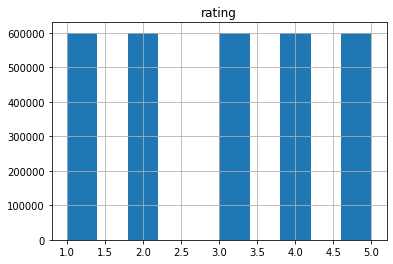

In [45]:
# ratings from the raw data is evenly distributed
df.hist()

In [47]:
# the percentage of missing data in each column
df.isnull().sum() / len(df)


rating    0.000000
title     0.000025
review    0.000000
dtype: float64

In [26]:
# 08/21 goal is to do sentiment analysis on reviews to see if it matches with ratings
# might change goal later on

# replace the rating: 3 and above as 1 and below 3 as 0.
def filter_data(value):
    if value>=3.0:
        return 1
    else:
        return 0
#creating a new column has the filtered data
df['modified'] = df['rating'].apply(filter_data)

In [27]:
df = df.dropna()

In [28]:
# random sample 10000 for easier computation, rather than 3M entries
df = df.sample(10000)

In [29]:
"""
in the statement ==> df.reset_index(drop=True,inplace=True)
what we actually do is we reset the index number in the dataset because
if we don't do it the column numbers will be disordered.
if we don't do we will have index number like 0,1,2,3,7,10,11,17.
if we have like this iteration is not possible we will get key value error
"""
df.reset_index(drop=True,inplace=True)

In [30]:
# let's take a look at our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
rating      10000 non-null int64
title       10000 non-null object
review      10000 non-null object
modified    10000 non-null int64
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [21]:
df.head()

rating                                              title  \
193869        1  The writer doesn't know anything about the sub...   
1732386       1                                            No Exit   
2416347       2                           No More Water in the Tub   
1020460       1                                 Low on cash Lenny?   
2306108       5  A treat for birders and lovers of folktales in...   

                                                    review  modified  
193869   The Arabs are Semites. So how can the writer s...         0  
1732386  I suppose if you like the tone and style found...         0  
2416347  No More Water in the Tub is a story about 2 bo...         0  
1020460  Let Love Rule is one of the BEST albums of all...         0  
2306108  I purchased this book as a gift for my Aunt Je...         1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe59ddfca10>,
      dtype=object)

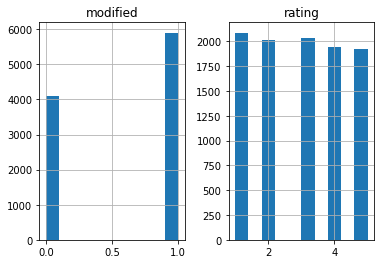

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anitatran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
 # Search through regex for the special character set, using the substitute function substitute the regex with space using this [^a-zA-Z ] which finds those which do not belong to a to z or A to Z. Then I made the sentence to lower case and then split it into words then I had to check whether the word belongs to the stopwords or not for this I used the porter stemmer class to perform it.
corpus = []
for i in range(0, 10000):
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
# vectorization
# convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.

# Creating the Bag of Words model using CountVectorizer
cv = CountVectorizer(max_features = 1500)
features = cv.fit_transform(corpus).toarray()
labels = df.iloc[:, -1].values

In [33]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [34]:
# multinomial NB
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 810  455]
 [ 358 1377]]


Accuracy is  72.9 %
Precision is  0.75
Recall is  0.79


In [35]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 799  466]
 [ 323 1412]]


Accuracy is  73.7 %
Precision is  0.75
Recall is  0.81


In [37]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


Confusion Matrix:
 [[ 756  509]
 [ 374 1361]]


Accuracy is  70.57 %
Precision is  0.73
Recall is  0.78


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
